## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.25, 0.5, 0.75]

In [7]:
results = {}
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for dropratio in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropratio = %.6f" % (dropratio))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-Dropratio-%s" % str(dropratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Dropratio = 0.250000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)   

Epoch 46/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.3158 - accuracy: 0.5300 - val_loss: 1.3274 - val_accuracy: 0.5208
Epoch 47/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.3144 - accuracy: 0.5311 - val_loss: 1.3214 - val_accuracy: 0.5285
Epoch 48/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.3070 - accuracy: 0.5337 - val_loss: 1.3235 - val_accuracy: 0.5284
Epoch 49/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.2975 - accuracy: 0.5351 - val_loss: 1.3187 - val_accuracy: 0.5294
Epoch 50/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.2909 - accuracy: 0.5383 - val_loss: 1.3148 - val_accuracy: 0.5303
Experiment with Dropratio = 0.500000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
___

Epoch 41/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.6229 - accuracy: 0.4199 - val_loss: 1.4999 - val_accuracy: 0.4697
Epoch 42/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.6201 - accuracy: 0.4178 - val_loss: 1.4951 - val_accuracy: 0.4676
Epoch 43/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.6143 - accuracy: 0.4188 - val_loss: 1.4961 - val_accuracy: 0.4690
Epoch 44/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.6119 - accuracy: 0.4215 - val_loss: 1.4849 - val_accuracy: 0.4718
Epoch 45/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.6100 - accuracy: 0.4224 - val_loss: 1.4865 - val_accuracy: 0.4710
Epoch 46/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.6056 - accuracy: 0.4251 - val_loss: 1.4784 - val_accuracy: 0.4765
Epoch 47/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.6074 - accuracy: 0.4255

Epoch 33/50
50000/50000 [==============================] - 7s 139us/step - loss: 2.0831 - accuracy: 0.1914 - val_loss: 2.1723 - val_accuracy: 0.1719
Epoch 34/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.0773 - accuracy: 0.1905 - val_loss: 2.1771 - val_accuracy: 0.1714
Epoch 35/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.0657 - accuracy: 0.1957 - val_loss: 2.1639 - val_accuracy: 0.1707
Epoch 36/50
50000/50000 [==============================] - 7s 139us/step - loss: 2.0661 - accuracy: 0.1939 - val_loss: 2.1796 - val_accuracy: 0.1655
Epoch 37/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.0668 - accuracy: 0.1945 - val_loss: 2.1612 - val_accuracy: 0.1714
Epoch 38/50
50000/50000 [==============================] - 7s 139us/step - loss: 2.0676 - accuracy: 0.1966 - val_loss: 2.1791 - val_accuracy: 0.1662
Epoch 39/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.0640 - accuracy: 0.1962

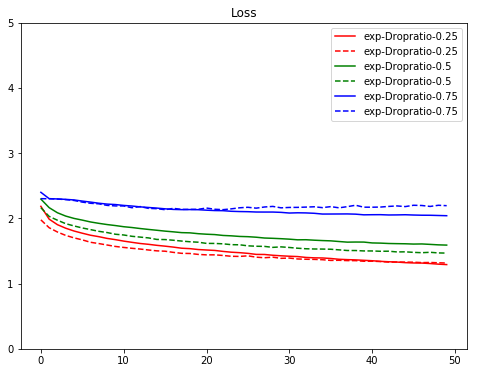

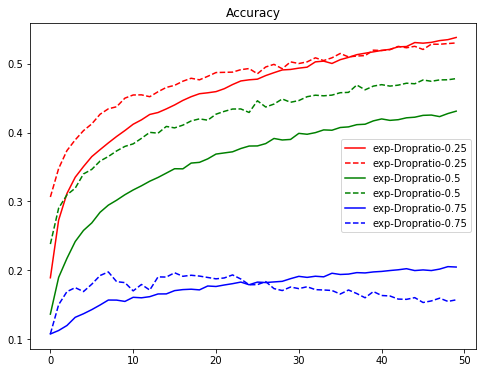

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()